In [63]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
df = pd.read_csv('https://raw.githubusercontent.com/mwaskom/seaborn-data/master/titanic.csv')

#NOTE: I did not drop na or clean the data in this assignment as confirmed earlier

In [64]:
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [65]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   survived     891 non-null    int64  
 1   pclass       891 non-null    int64  
 2   sex          891 non-null    object 
 3   age          714 non-null    float64
 4   sibsp        891 non-null    int64  
 5   parch        891 non-null    int64  
 6   fare         891 non-null    float64
 7   embarked     889 non-null    object 
 8   class        891 non-null    object 
 9   who          891 non-null    object 
 10  adult_male   891 non-null    bool   
 11  deck         203 non-null    object 
 12  embark_town  889 non-null    object 
 13  alive        891 non-null    object 
 14  alone        891 non-null    bool   
dtypes: bool(2), float64(2), int64(4), object(7)
memory usage: 92.4+ KB


## Question 1: Proportion of Male to Female

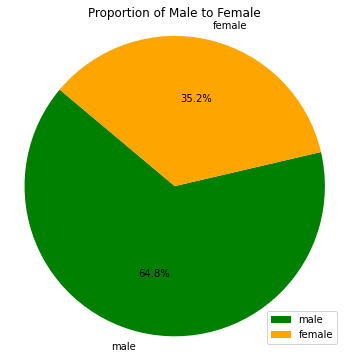

In [66]:
sex_counts = df['sex'].value_counts()

# Create a pie chart
plt.figure(figsize=(6, 6))
plt.pie(sex_counts, labels=sex_counts.index, autopct='%1.1f%%', startangle=140, colors=['green', 'orange'])
plt.legend(loc='lower right', labels=sex_counts.index)
plt.title('Proportion of Male to Female')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()




## Question 2: Proportion of passengers in each class

In [67]:
# Find unique values of a column
print(df['class'].unique())

['Third' 'First' 'Second']


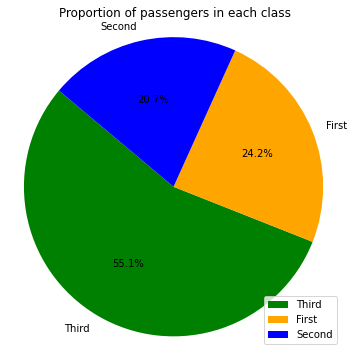

In [68]:
class_category = df['class'].value_counts()

# Create a pie chart
plt.figure(figsize=(6, 6))
plt.pie(class_category, labels=class_category.index, autopct='%1.1f%%', startangle=140, colors=['green', 'orange','blue'])
plt.legend(loc='lower right', labels=class_category.index)
plt.title('Proportion of passengers in each class')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()


## Question 2: Relationship between age and fare

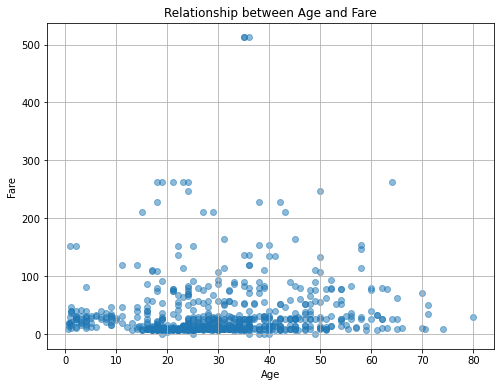

In [69]:
plt.figure(figsize=(8, 6))
plt.scatter(df['age'], df['fare'], alpha=0.5)  # 'alpha' controls the transparency of the points
plt.title('Relationship between Age and Fare')
plt.xlabel('Age')
plt.ylabel('Fare')
plt.grid(True)
plt.show()

### For majority of the passengers regardless of their ages, the fares are mostly below 100. 

In [70]:
correlation = df['age'].corr(df['fare'])
print("Correlation coefficient between Age and Fare:", correlation)

Correlation coefficient between Age and Fare: 0.0960666917690389


### We can also see that the correlation is 9.6% which is very low and not significant enough. This goes to say that age is not a determinant of the class fare

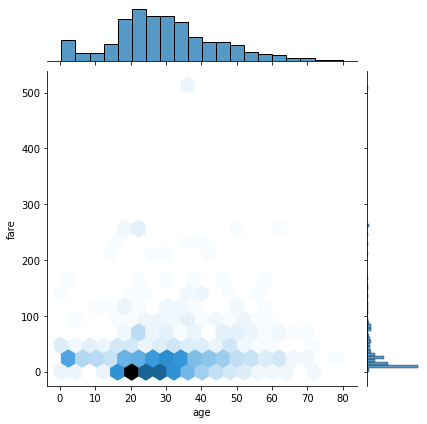

In [71]:
import seaborn as sns
sns.jointplot(data=df, x='age', y='fare', kind='hex', gridsize=20)
plt.show()

In [72]:
most_common_age = df['age'].mode().values[0]

print("Most common age:", most_common_age)


Most common age: 24.0


In [ ]:
#The distribution of age looks more normal than fare which is left skewed

### we can see that in line with the plot, the most occuring age in the dataset is 24.0, which is around where the density is darkest. Apparently, from around ages 15 to 40, is the age for most of the customers who were on this ship.

In [73]:
# Find the index where the fare is the highest
df['fare'].max()


512.3292



## Question 4 

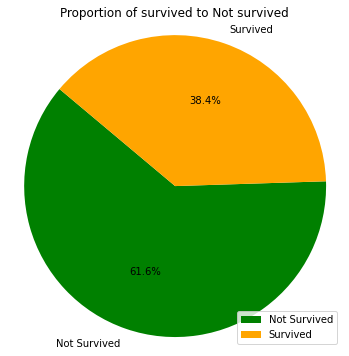

In [74]:
#Proportion of survived to not survived 

# Mapping for survived column
survival_mapping = {1: "Survived", 0: "Not Survived"}
df['survived'] = df['survived'].map(survival_mapping)

survival_counts = df['survived'].value_counts()

# Create a pie chart
plt.figure(figsize=(6, 6))
plt.pie(survival_counts, labels=survival_counts.index, autopct='%1.1f%%', startangle=140, colors=['green', 'orange'])
plt.legend(loc='lower right', labels=survival_counts.index)
plt.title('Proportion of survived to Not survived')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()




### Majority of the people who were on this ship did not survive. 


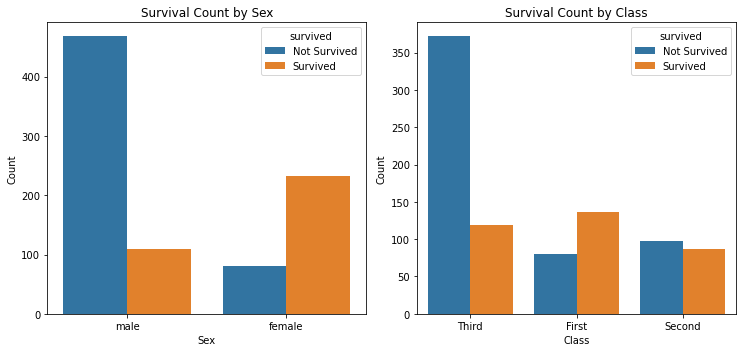

In [75]:
# Create bar charts
#For sex 
plt.figure(figsize=(15, 5))


plt.subplot(1, 3, 2)
sns.countplot(data=df, x='sex', hue='survived')
plt.title("Survival Count by Sex")
plt.xlabel("Sex")
plt.ylabel("Count")


#For class
plt.subplot(1, 3, 3)
sns.countplot(data=df, x='class', hue='survived')
plt.title("Survival Count by Class")
plt.xlabel("Class")
plt.ylabel("Count")

plt.tight_layout()
plt.show()





### For Sex, The proportion of the female who survived is more than the male. You can confirm by viewing the percentages below.
### while for Class, those in first class survived the most. 

In [ ]:
#Sex

In [76]:
sex_survival_counts = df.groupby(['sex', 'survived']).size().unstack()
sex_survival_counts

survived,Not Survived,Survived
sex,,
female,81,233
male,468,109


In [77]:
sex_survival_proportions = sex_survival_counts.div(sex_survival_counts.sum(axis=1), axis=0)
sex_survival_proportions

survived,Not Survived,Survived
sex,,
female,0.257962,0.742038
male,0.811092,0.188908


In [ ]:
#Class

In [78]:
class_survival_counts = df.groupby(['class', 'survived']).size().unstack()
class_survival_counts

survived,Not Survived,Survived
class,,
First,80,136
Second,97,87
Third,372,119


In [79]:
class_survival_proportions = class_survival_counts.div(class_survival_counts.sum(axis=1), axis=0)
class_survival_proportions

survived,Not Survived,Survived
class,,
First,0.370370,0.629630
Second,0.527174,0.472826
Third,0.757637,0.242363


In [80]:
#For age, The actual age range, tying to bin the ages for the chart to be more useful. 

print(df['age'].max())
print(df['age'].min())

80.0
0.42


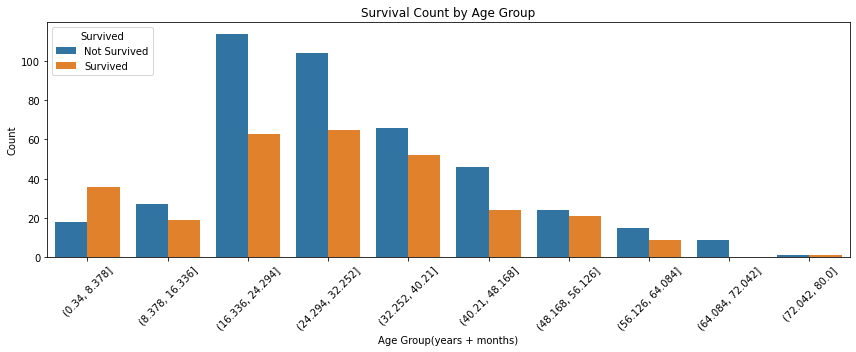

In [81]:
# Bin the age column into 20 age groups
df['age_group'] = pd.cut(df['age'], bins=10)

# Create bar chart for "Survival Count by Age"
plt.figure(figsize=(12, 5))
sns.countplot(data=df, x='age_group', hue='survived')
plt.title("Survival Count by Age Group")
plt.xlabel("Age Group(years + months)")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.legend(title="Survived")
plt.tight_layout()
plt.show()

In [82]:
# Get the actual figures and percentage for survival count by age group
age_group_survival_counts = df.groupby(['age_group', 'survived']).size().unstack()
age_group_survival_proportions = age_group_survival_counts.div(age_group_survival_counts.sum(axis=1), axis=0)

print("Survival Count by Age Group:")
print(age_group_survival_counts)
print("\nProportion Percentages:")
print(age_group_survival_proportions)

Survival Count by Age Group:
survived          Not Survived  Survived
age_group                               
(0.34, 8.378]               18        36
(8.378, 16.336]             27        19
(16.336, 24.294]           114        63
(24.294, 32.252]           104        65
(32.252, 40.21]             66        52
(40.21, 48.168]             46        24
(48.168, 56.126]            24        21
(56.126, 64.084]            15         9
(64.084, 72.042]             9         0
(72.042, 80.0]               1         1

Proportion Percentages:
survived          Not Survived  Survived
age_group                               
(0.34, 8.378]         0.333333  0.666667
(8.378, 16.336]       0.586957  0.413043
(16.336, 24.294]      0.644068  0.355932
(24.294, 32.252]      0.615385  0.384615
(32.252, 40.21]       0.559322  0.440678
(40.21, 48.168]       0.657143  0.342857
(48.168, 56.126]      0.533333  0.466667
(56.126, 64.084]      0.625000  0.375000
(64.084, 72.042]      1.000000  0.000000
(72

### Everyone within the age range of (64.084, 72.042) did not survive
### The babies aged (0.34, 8.378) had the highest survival portion, you can view the chart